In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

print("Библиотеки загружены!")

Библиотеки загружены!


In [24]:
# Для CSV (вариант 1)
df = pd.read_csv('../data/titanic.csv')  

# Для Excel (вариант 2)
# df = pd.read_excel('../data/data.xlsx')

# Проверка
display(df.head(3))  # первые 3 строки
print(f"\nРазмер данных: {df.shape}")
print("\nИнформация о типах данных:")
df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



Размер данных: (891, 12)

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# 1. Пропущенные значения
print("Пропуски до обработки:")
display(df.isnull().sum())

# Заполнение числовых колонок
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Заполнение категориальных
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Обработка выбросов (пример для Age)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] >= (Q1 - 1.5*IQR)) & (df['Age'] <= (Q3 + 1.5*IQR))]

Пропуски до обработки:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

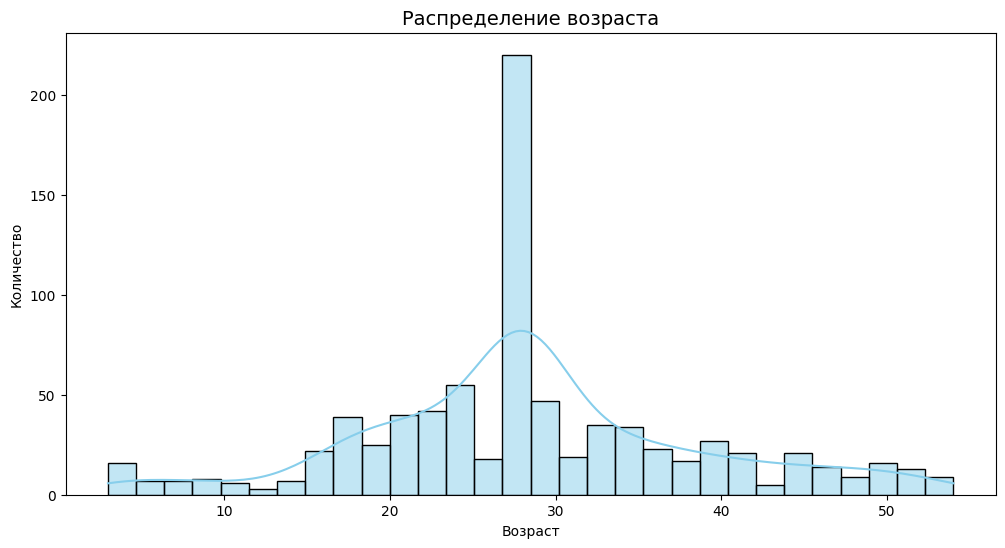

/var/folders/hc/ts4p5yzn7jzc0lz2zv292wg80000gn/T/ipykernel_76466/2315142300.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='pastel')


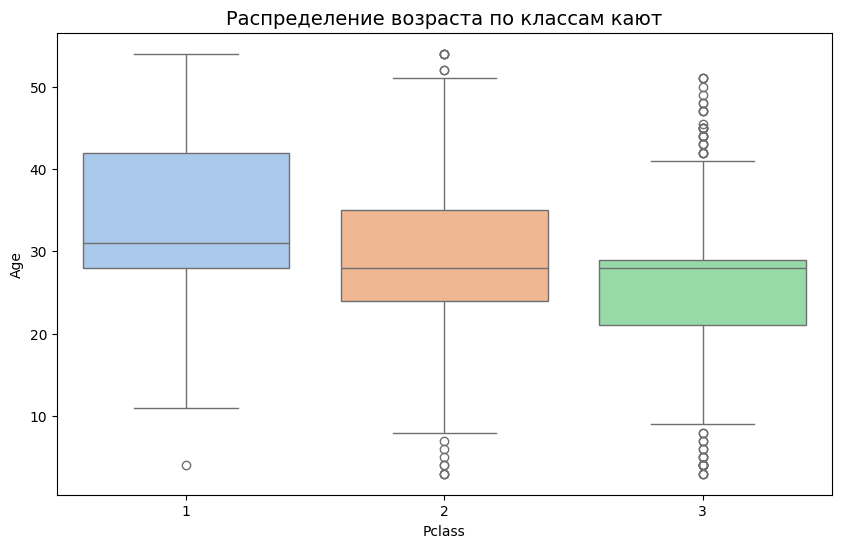

ValueError: could not convert string to float: 'S'

<Figure size 1000x800 with 0 Axes>

In [26]:
# 1. Гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Распределение возраста', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# 2. Boxplot по группам
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='pastel')
plt.title('Распределение возраста по классам кают', fontsize=14)
plt.show()

# 3. Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция числовых признаков', fontsize=14)
plt.show()

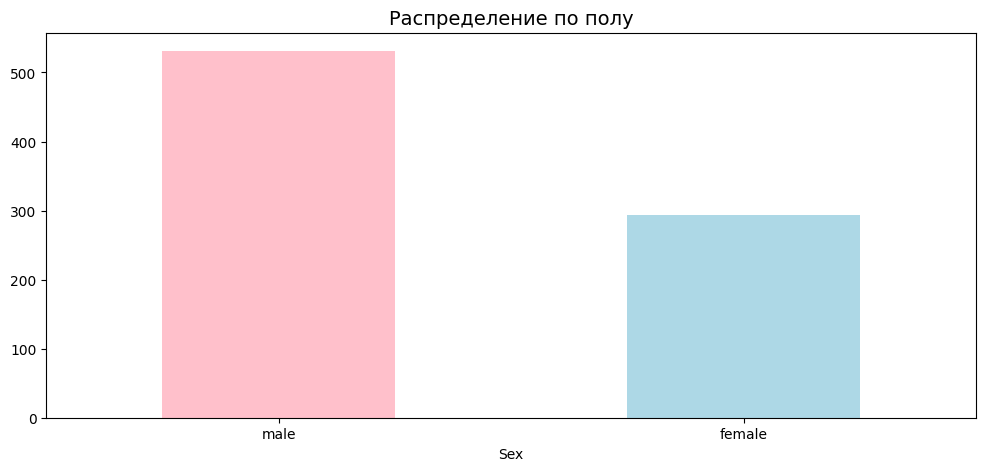

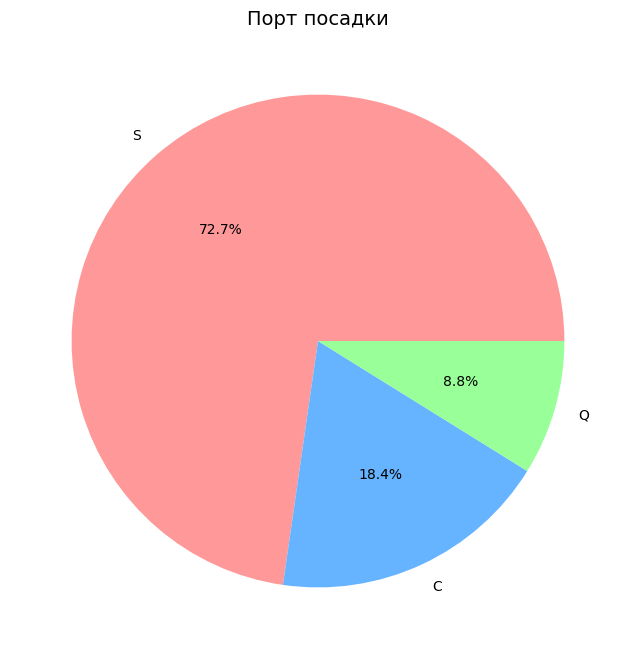

In [27]:
# 1. Столбчатые диаграммы
plt.figure(figsize=(12, 5))
df['Sex'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Распределение по полу', fontsize=14)
plt.xticks(rotation=0)
plt.show()

# 2. Круговые диаграммы
plt.figure(figsize=(8, 8))
df['Embarked'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title('Порт посадки', fontsize=14)
plt.ylabel('')
plt.show()

Выживаемость по классам:


Survived,0,1
Pclass,,
1,62,125
2,91,78
3,358,111


<Figure size 1000x600 with 0 Axes>

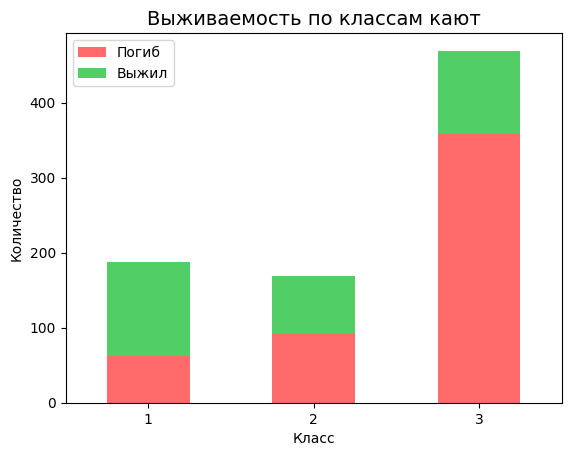

In [28]:
# 1. Кросс-таблица
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print("Выживаемость по классам:")
display(cross_tab)

# 2. Визуализация
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, color=['#ff6b6b','#51cf66'])
plt.title('Выживаемость по классам кают', fontsize=14)
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(['Погиб', 'Выжил'])
plt.xticks(rotation=0)
plt.show()

In [29]:
# 1. Сохраняем очищенные данные
df.to_csv('../data/cleaned_data.csv', index=False)

# 2. Экспорт блокнота в HTML
!jupyter nbconvert --to html analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 364395 bytes to analysis.html
